# Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import time
import category_encoders as ce
import sklearn
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score


In [3]:
modelData_csv= 'mini_project02.csv'

In [4]:
dfNumeric = pd.read_csv(modelData_csv)

In [5]:
dfNumeric.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
0,0.247895,0.256988,0.375755,40,1000,625,30,0
1,0.378628,0.542036,0.375755,88,80000,22,3,0
2,0.411704,0.518826,0.375755,9,20,35,3,1
3,0.199876,0.123011,0.375755,80,99,145,25,1
4,0.247895,0.256988,0.375755,29,1900,387,10,0


In [6]:
dfSample = dfNumeric.sample(n=10000, random_state=42)

In [7]:
dfSample.isna().sum()

Category_encoded       0
Subcategory_encoded    0
Country_encoded        0
Duration               0
Goal                   0
Pledged                0
Backers                0
State                  0
dtype: int64

In [8]:
dfSample.head()

,Category_encoded,Subcategory_encoded,Country_encoded,Duration,Goal,Pledged,Backers,State
329774,0.358292,0.559062,0.361374,39,937,1082,35,1
144667,0.249222,0.287872,0.375755,34,5000,6847,89,1
234044,0.242185,0.250918,0.258721,30,1108,135,8,0
36434,0.314747,0.269747,0.375755,60,3000,360,12,0
353616,0.354469,0.360667,0.314513,30,59600,336,14,0


## Functions

In [10]:
imageTag = []
for i in range(60):
    if(i<= 60):
        img= f'image0{i}'
        imageTag.append(img)
imageTag

['image00',
 'image01',
 'image02',
 'image03',
 'image04',
 'image05',
 'image06',
 'image07',
 'image08',
 'image09',
 'image010',
 'image011',
 'image012',
 'image013',
 'image014',
 'image015',
 'image016',
 'image017',
 'image018',
 'image019',
 'image020',
 'image021',
 'image022',
 'image023',
 'image024',
 'image025',
 'image026',
 'image027',
 'image028',
 'image029',
 'image030',
 'image031',
 'image032',
 'image033',
 'image034',
 'image035',
 'image036',
 'image037',
 'image038',
 'image039',
 'image040',
 'image041',
 'image042',
 'image043',
 'image044',
 'image045',
 'image046',
 'image047',
 'image048',
 'image049',
 'image050',
 'image051',
 'image052',
 'image053',
 'image054',
 'image055',
 'image056',
 'image057',
 'image058',
 'image059']

In [11]:
def savePlotFunction(imageRef):
    plt.savefig(f'{imageTag[imageRef]}.png', facecolor = 'w', bbox_inches= 'tight',
                pad_inches=0.3, transparent= True)
    plt.show()
    return

## Define X and y

In [13]:
# Select independant variables 'X'
predict_cols = [c for c in dfSample.columns if c not in ['State', 'Country_encoded', 'Duration', 'Goal']]
predict_cols

['Category_encoded', 'Subcategory_encoded', 'Pledged', 'Backers']

In [14]:
X = pd.DataFrame(dfSample, columns = predict_cols)
X.head()

,Category_encoded,Subcategory_encoded,Pledged,Backers
329774,0.358292,0.559062,1082,35
144667,0.249222,0.287872,6847,89
234044,0.242185,0.250918,135,8
36434,0.314747,0.269747,360,12
353616,0.354469,0.360667,336,14


In [15]:
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [16]:
X=pd.DataFrame(X, columns = predict_cols)
X.head()

,Category_encoded,Subcategory_encoded,Pledged,Backers
329774,0.358292,0.559062,1082,35
144667,0.249222,0.287872,6847,89
234044,0.242185,0.250918,135,8
36434,0.314747,0.269747,360,12
353616,0.354469,0.360667,336,14


In [17]:
X.shape

(10000, 4)

In [18]:
y = dfSample['State']
y

329774    1
144667    1
234044    0
36434     0
353616    0
         ..
137690    1
281059    1
18031     1
136136    1
287054    0
Name: State, Length: 10000, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(8000, 4)

In [21]:
X_test.shape

(2000, 4)

In [22]:
y_train.shape

(8000,)

In [23]:
y_test.shape

(2000,)

## Logistic Regression (04)

In [25]:
# logRegMod = LogisticRegression()

In [26]:
# logReg_param_grid = [{
#     'penalty' : ['l1', 'l2', 'elasticnet',],
#     'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter' : [1000, 5000, 10000]
#                   }]

In [27]:
# logReg_grid_search = GridSearchCV(logRegMod04,
#                                   logReg_param_grid,
#                                   cv=2,
#                                   scoring='accuracy',
#                                   n_jobs=-1)

In [28]:
# %%time
# logReg_grid_search.fit(X, y)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [1000, 5000, 10000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}],
             scoring='accuracy')

best_estimator_: LogisticRegression
LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

LogisticRegression
?
LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [30]:
logRegMod04 = LogisticRegression()

In [31]:
logRegHP = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', C=1)

In [32]:
%%time
logRegHP.fit(X_train, y_train)

CPU times: total: 188 ms
Wall time: 64.2 ms


LogisticRegression(C=1, max_iter=1000)

In [33]:
y_pred04 = logRegHP.predict(X_test)
y_pred04

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [34]:
y_pred_prob04 = logRegHP.predict_proba(X_test)
y_pred_prob04

array([[6.75348241e-01, 3.24651759e-01],
       [8.15698048e-01, 1.84301952e-01],
       [6.58452056e-01, 3.41547944e-01],
       ...,
       [3.81999114e-01, 6.18000886e-01],
       [2.50864884e-10, 1.00000000e+00],
       [9.23863619e-01, 7.61363805e-02]])

In [35]:
accuracy04 = accuracy_score(y_test, y_pred04)
accuracy04

0.8225

In [36]:
cmLogRegHp = metrics.confusion_matrix(y_test, y_pred04)
cmLogRegHp

array([[1206,   78],
       [ 277,  439]], dtype=int64)

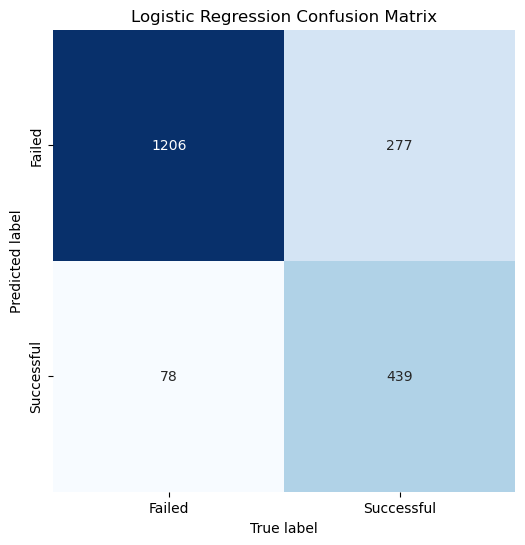

In [37]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Failed', 'Successful')
# Confusion Matrix
sns.heatmap(cmLogRegHp.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(40)

In [38]:
logRegClassReport = classification_report(y_test, y_pred04)
print(logRegClassReport)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1284
           1       0.85      0.61      0.71       716

    accuracy                           0.82      2000
   macro avg       0.83      0.78      0.79      2000
weighted avg       0.83      0.82      0.81      2000



## GradientBoost (05)

In [40]:
grb = GradientBoostingClassifier()

In [41]:
# grb_param_grid = [{
#     'learning_rate': [0.5, 1.0, 1.5, 2.0],
#     'n_estimators': [10, 20, 30, 40, 50],
#     'loss': ['exponential', 'log_loss']
# }]

    

In [42]:
# grb_grid_search = GridSearchCV(grb,
#                                grb_param_grid,
#                                cv=2,
#                                scoring='accuracy',
#                                n_jobs=-1)

In [43]:
# %%time
# grb_grid_search.fit(X, y)

In [44]:
# grb_grid_search.best_score_

In [45]:
# grb_grid_search.best_params_

In [46]:
grb.fit(X, y)

GradientBoostingClassifier()

In [47]:
y_pred07 = grb.predict(X_test)
y_pred07

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [48]:
y_pred_prob07 = grb.predict_proba(X_test)
y_pred_prob07

array([[0.23306535, 0.76693465],
       [0.99239118, 0.00760882],
       [0.98980005, 0.01019995],
       ...,
       [0.13889829, 0.86110171],
       [0.02330939, 0.97669061],
       [0.86674802, 0.13325198]])

In [49]:
accuracy07 = accuracy_score(y_test, y_pred07)
accuracy07

0.8695

In [50]:
cmGrb = metrics.confusion_matrix(y_test, y_pred07)
cmGrb

array([[1131,  153],
       [ 108,  608]], dtype=int64)

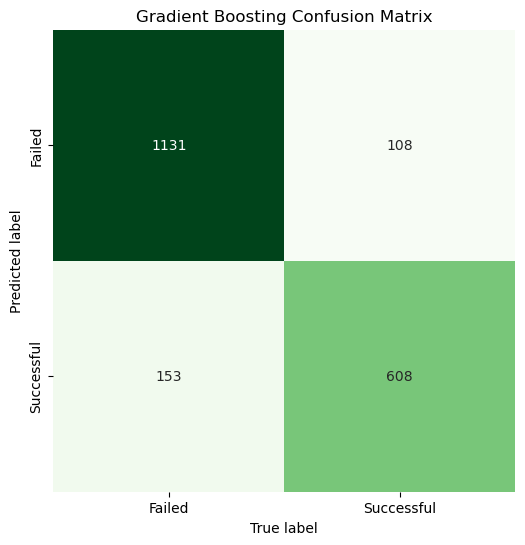

In [51]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(cmGrb.T, square= True, annot= True, fmt= 'd',cbar= False, cmap= 'Greens', 
            ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Gradient Boosting Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(45)

In [52]:
grbClassReport = classification_report(y_test, y_pred07)
print(grbClassReport)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1284
           1       0.80      0.85      0.82       716

    accuracy                           0.87      2000
   macro avg       0.86      0.87      0.86      2000
weighted avg       0.87      0.87      0.87      2000



## Random Forest Model (06)

In [54]:
# ranFor05 = RandomForestClassifier()

In [55]:
# param_grid05 = [{
#     'n_estimators': [500, 1000, 1500],
#     'criterion': ['entropy', 'gini'],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_depth': [10, 20, 30],
# }]
    

In [56]:
# ranFor_grid_search = GridSearchCV(ranFor05,
#                              param_grid05,
#                              cv=2,
#                              scoring='accuracy',
#                              n_jobs=-1)

In [57]:
# %%time
# ranFor_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [10, 20, 30],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [5, 10, 15],
                          'n_estimators': [500, 1000, 1500]}],
             scoring='accuracy')

best_estimator_: RandomForestClassifier
RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=1500)

RandomForestClassifier

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=1500)

In [59]:
# ranFor_grid_search.best_params_

In [60]:
# ranFor_grid_search.best_score_

In [61]:
ranForHP = RandomForestClassifier(n_estimators= 100,
                                  criterion= 'gini',
                                  min_samples_split= 5,
                                  min_samples_leaf= 1,
                                  max_depth= 10,
                                 )

In [62]:
%%time
ranForHP.fit(X_train, y_train)

CPU times: total: 500 ms
Wall time: 499 ms


RandomForestClassifier(max_depth=10, min_samples_split=5)

In [63]:
y_pred06 = ranForHP.predict(X_test)
y_pred06

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [64]:
y_pred_prob06 = ranForHP.predict_proba(X_test)
y_pred_prob06

array([[0.20005489, 0.79994511],
       [1.        , 0.        ],
       [0.98509272, 0.01490728],
       ...,
       [0.33124158, 0.66875842],
       [0.00353549, 0.99646451],
       [0.72564947, 0.27435053]])

In [65]:
accuracy06 = accuracy_score(y_test, y_pred06)
accuracy06

0.866

In [66]:
ranForHPConfuseMatrix = metrics.confusion_matrix(y_test, y_pred06)
ranForHPConfuseMatrix

array([[1128,  156],
       [ 112,  604]], dtype=int64)

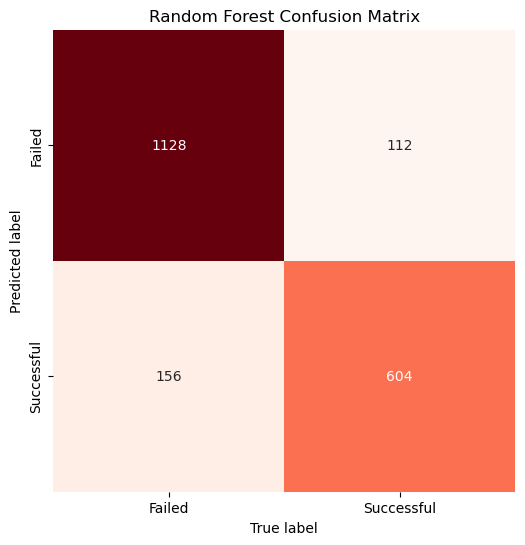

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(ranForHPConfuseMatrix.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

savePlotFunction(42)

In [68]:
ranForClassReport = classification_report(y_test, y_pred06)
print(ranForClassReport)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1284
           1       0.79      0.84      0.82       716

    accuracy                           0.87      2000
   macro avg       0.85      0.86      0.86      2000
weighted avg       0.87      0.87      0.87      2000



## Naive Bayes Bernoulli

In [70]:
# gnbModel05 = BernoulliNB()

In [71]:
# gnb_param_grid = {
#     'alpha': [0.1, 1.0, 10.0,],
#     'binarize': [0.0, 0.5, 1.0],
# }

In [72]:
# gnb_grid_search = GridSearchCV(gnbModel05,
#                                gnb_param_grid,
#                                cv=5,
#                                scoring='accuracy',
#                                return_train_score=False,
#                                verbose=1)

In [73]:
# gnbHP = BernoulliNB(alpha=10.0, binarize=0.5)

In [74]:
# %%time
# gnbHP.fit(X_train, y_train)

In [75]:
# y_pred05 = gnbHP.predict(X_test)
# y_pred05

In [76]:
# y_pred_prob05 = gnbHP.predict_proba(X_test)
# y_pred_prob05

In [77]:
# gnbHPConfuseMatrix = metrics.confusion_matrix(y_test, y_pred05)
# gnbHPConfuseMatrix

In [78]:
# # plot
# fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# # Confusion Matrix
# sns.heatmap(gnbHPConfuseMatrix.T, square= True, annot= True, fmt= 'd',cbar= False, 
#             cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# # Title 
# ax.set_title('Bernouilli Confusion Matrix')
# ax.set_xlabel('True label')
# ax.set_ylabel('Predicted label')

# savePlotFunction(41)

In [79]:
# gnbClassReport = classification_report(y_test, y_pred05)
# print(gnbClassReport)

## Class Report DataFrame

In [81]:
logRegClassReportDict = metrics.classification_report(y_test, y_pred04, output_dict=True)
logRegClassReportDict

{'0': {'precision': 0.813216453135536,
  'recall': 0.9392523364485982,
  'f1-score': 0.8717022045536682,
  'support': 1284.0},
 '1': {'precision': 0.8491295938104448,
  'recall': 0.6131284916201117,
  'f1-score': 0.7120843471208435,
  'support': 716.0},
 'accuracy': 0.8225,
 'macro avg': {'precision': 0.8311730234729904,
  'recall': 0.776190414034355,
  'f1-score': 0.7918932758372559,
  'support': 2000.0},
 'weighted avg': {'precision': 0.8260733574971535,
  'recall': 0.8225,
  'f1-score': 0.8145590115927169,
  'support': 2000.0}}

In [82]:
logRegClassReportDict['macro avg']

{'precision': 0.8311730234729904,
 'recall': 0.776190414034355,
 'f1-score': 0.7918932758372559,
 'support': 2000.0}

In [83]:
logRegClassReportDict['macro avg']['precision']

0.8311730234729904

In [84]:
arr04 = []
for i in logRegClassReportDict['macro avg']:
    logClassMetric=logRegClassReportDict['macro avg'][i]
    arr04.append(logClassMetric)
arr04.append('logistic_regression')
arr04

[0.8311730234729904,
 0.776190414034355,
 0.7918932758372559,
 2000.0,
 'logistic_regression']

In [85]:
gnbClassReportDict = metrics.classification_report(y_test, y_pred07, output_dict=True)
gnbClassReportDict

{'0': {'precision': 0.9128329297820823,
  'recall': 0.8808411214953271,
  'f1-score': 0.896551724137931,
  'support': 1284.0},
 '1': {'precision': 0.7989487516425755,
  'recall': 0.8491620111731844,
  'f1-score': 0.8232904536222072,
  'support': 716.0},
 'accuracy': 0.8695,
 'macro avg': {'precision': 0.8558908407123289,
  'recall': 0.8650015663342557,
  'f1-score': 0.8599210888800691,
  'support': 2000.0},
 'weighted avg': {'precision': 0.8720623940081389,
  'recall': 0.8695,
  'f1-score': 0.870324189293302,
  'support': 2000.0}}

In [86]:
gnbClassReportDict['macro avg']['precision']

0.8558908407123289

In [87]:
arr07= []
for i in gnbClassReportDict['macro avg']:
    gnbClassMetric=gnbClassReportDict['macro avg'][i]
    arr07.append(gnbClassMetric)
arr07.append('gradient_boosting')
arr07

[0.8558908407123289,
 0.8650015663342557,
 0.8599210888800691,
 2000.0,
 'gradient_boosting']

In [88]:
ranForClassReportDict = metrics.classification_report(y_test, y_pred06, output_dict=True)
ranForClassReportDict

{'0': {'precision': 0.9096774193548387,
  'recall': 0.8785046728971962,
  'f1-score': 0.8938193343898574,
  'support': 1284.0},
 '1': {'precision': 0.7947368421052632,
  'recall': 0.8435754189944135,
  'f1-score': 0.8184281842818428,
  'support': 716.0},
 'accuracy': 0.866,
 'macro avg': {'precision': 0.8522071307300509,
  'recall': 0.8610400459458049,
  'f1-score': 0.8561237593358502,
  'support': 2000.0},
 'weighted avg': {'precision': 0.8685286926994906,
  'recall': 0.866,
  'f1-score': 0.8668293026511883,
  'support': 2000.0}}

In [89]:
ranForClassReportDict['macro avg']['precision']

0.8522071307300509

In [90]:
arr06= []
for i in ranForClassReportDict['macro avg']:
    ranForClassMetric=ranForClassReportDict['macro avg'][i]
    arr06.append(ranForClassMetric)
arr06.append('random_forest')
arr06

[0.8522071307300509,
 0.8610400459458049,
 0.8561237593358502,
 2000.0,
 'random_forest']

In [91]:
modelArr06= []
modelArr06.append(arr04)
modelArr06.append(arr07)
modelArr06.append(arr06)

modelArr06

[[0.8311730234729904,
  0.776190414034355,
  0.7918932758372559,
  2000.0,
  'logistic_regression'],
 [0.8558908407123289,
  0.8650015663342557,
  0.8599210888800691,
  2000.0,
  'gradient_boosting'],
 [0.8522071307300509,
  0.8610400459458049,
  0.8561237593358502,
  2000.0,
  'random_forest']]

In [92]:
comparisonCols = ['precision', 'recall', 'f1-score', 'support', 'model']
comparisonCols

['precision', 'recall', 'f1-score', 'support', 'model']

In [93]:
dfModCompare = pd.DataFrame(modelArr06, columns=comparisonCols)
dfModCompare

,precision,recall,f1-score,support,model
0,0.831173,0.776190,0.791893,2000.0,logistic_regression
1,0.855891,0.865002,0.859921,2000.0,gradient_boosting
2,0.852207,0.861040,0.856124,2000.0,random_forest


In [94]:
dfModIndex = dfModCompare
dfModIndex.set_index('model', inplace=True)
dfModIndex.head()

,precision,recall,f1-score,support
model,,,,
logistic_regression,0.831173,0.776190,0.791893,2000.0
gradient_boosting,0.855891,0.865002,0.859921,2000.0
random_forest,0.852207,0.861040,0.856124,2000.0


In [95]:
dfModIndex.index.names = ['']
dfModIndex.head()

,precision,recall,f1-score,support
,,,,
logistic_regression,0.831173,0.776190,0.791893,2000.0
gradient_boosting,0.855891,0.865002,0.859921,2000.0
random_forest,0.852207,0.861040,0.856124,2000.0


In [96]:
dfModIndex.iloc[:1,:]


,precision,recall,f1-score,support
,,,,
logistic_regression,0.831173,0.77619,0.791893,2000.0


In [97]:
dfModIndex.iloc[1:2,:]


,precision,recall,f1-score,support
,,,,
gradient_boosting,0.855891,0.865002,0.859921,2000.0


In [98]:
dfModIndex.iloc[2:3,:]

,precision,recall,f1-score,support
,,,,
random_forest,0.852207,0.86104,0.856124,2000.0


## ROC Curve

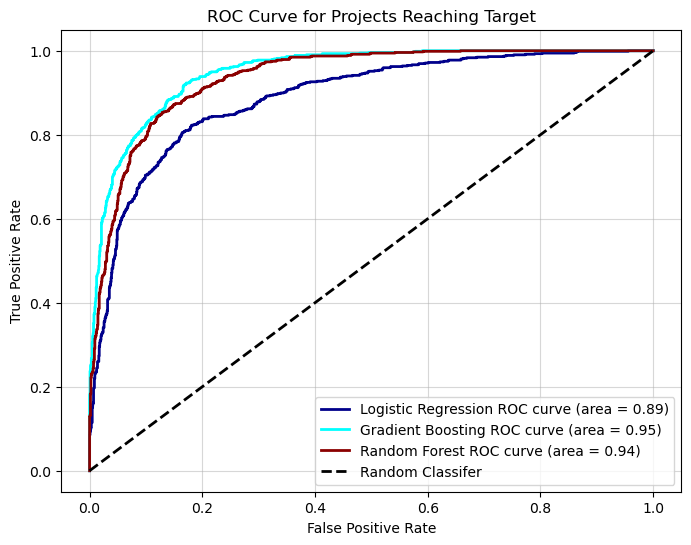

In [190]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds04 = logRegHP.predict_proba(X_test)[:,1]
preds05 = grb.predict_proba(X_test)[:,1]
preds06 = ranForHP.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr04, tpr04, _ = metrics.roc_curve(y_test, preds04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, preds05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, preds06)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)

# Plot the ROC Curve
plt.figure(figsize =(8, 6))
lw = 2
plt.plot(fpr04, tpr04, color='darkblue', lw = lw, label = 'Logistic Regression ROC curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='aqua', lw = lw, label = 'Gradient Boosting ROC curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='darkred', lw = lw, label = 'Random Forest ROC curve (area = %0.2f)' % roc_auc06)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Projects Reaching Target')
plt.legend(loc = "lower right")

savePlotFunction(43)

In [101]:
# # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
# preds04 = logRegHP.predict_proba(X_test)[:,1]
# preds05 = grb.predict_proba(X_test)[:,1]
# preds06 = ranForHP.predict_proba(X_test)[:,1]

# # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
# fpr04, tpr04, _ = metrics.roc_curve(y_test, preds04)
# fpr05, tpr05, _ = metrics.roc_curve(y_test, preds05)
# fpr06, tpr06, _ = metrics.roc_curve(y_test, preds06)

# # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
# roc_auc04 = metrics.auc(fpr04, tpr04)
# roc_auc05 = metrics.auc(fpr05, tpr05)
# roc_auc06 = metrics.auc(fpr06, tpr06)

# # Plot the ROC Curve
# plt.figure(figsize =(8, 6))
# lw = 2
# plt.plot(fpr04, tpr04, color='darkblue', lw = lw, label = 'Logistic Regression ROC curve (area = %0.2f)' % roc_auc04)
# plt.plot(fpr05, tpr05, color='aqua', lw = lw, label = 'Gradient Boosting ROC curve (area = %0.2f)' % roc_auc05)
# plt.plot(fpr06, tpr06, color='darkred', lw = lw, label = 'Random Forest ROC curve (area = %0.2f)' % roc_auc06)
# plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
# plt.xlim([-0.05, 0.2])
# plt.ylim([0.8, 1.05])
# plt.grid(alpha=0.5)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Projects Reaching Target')
# plt.legend(loc = "lower right")

# savePlotFunction(45)

## Learning Curve

In [103]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

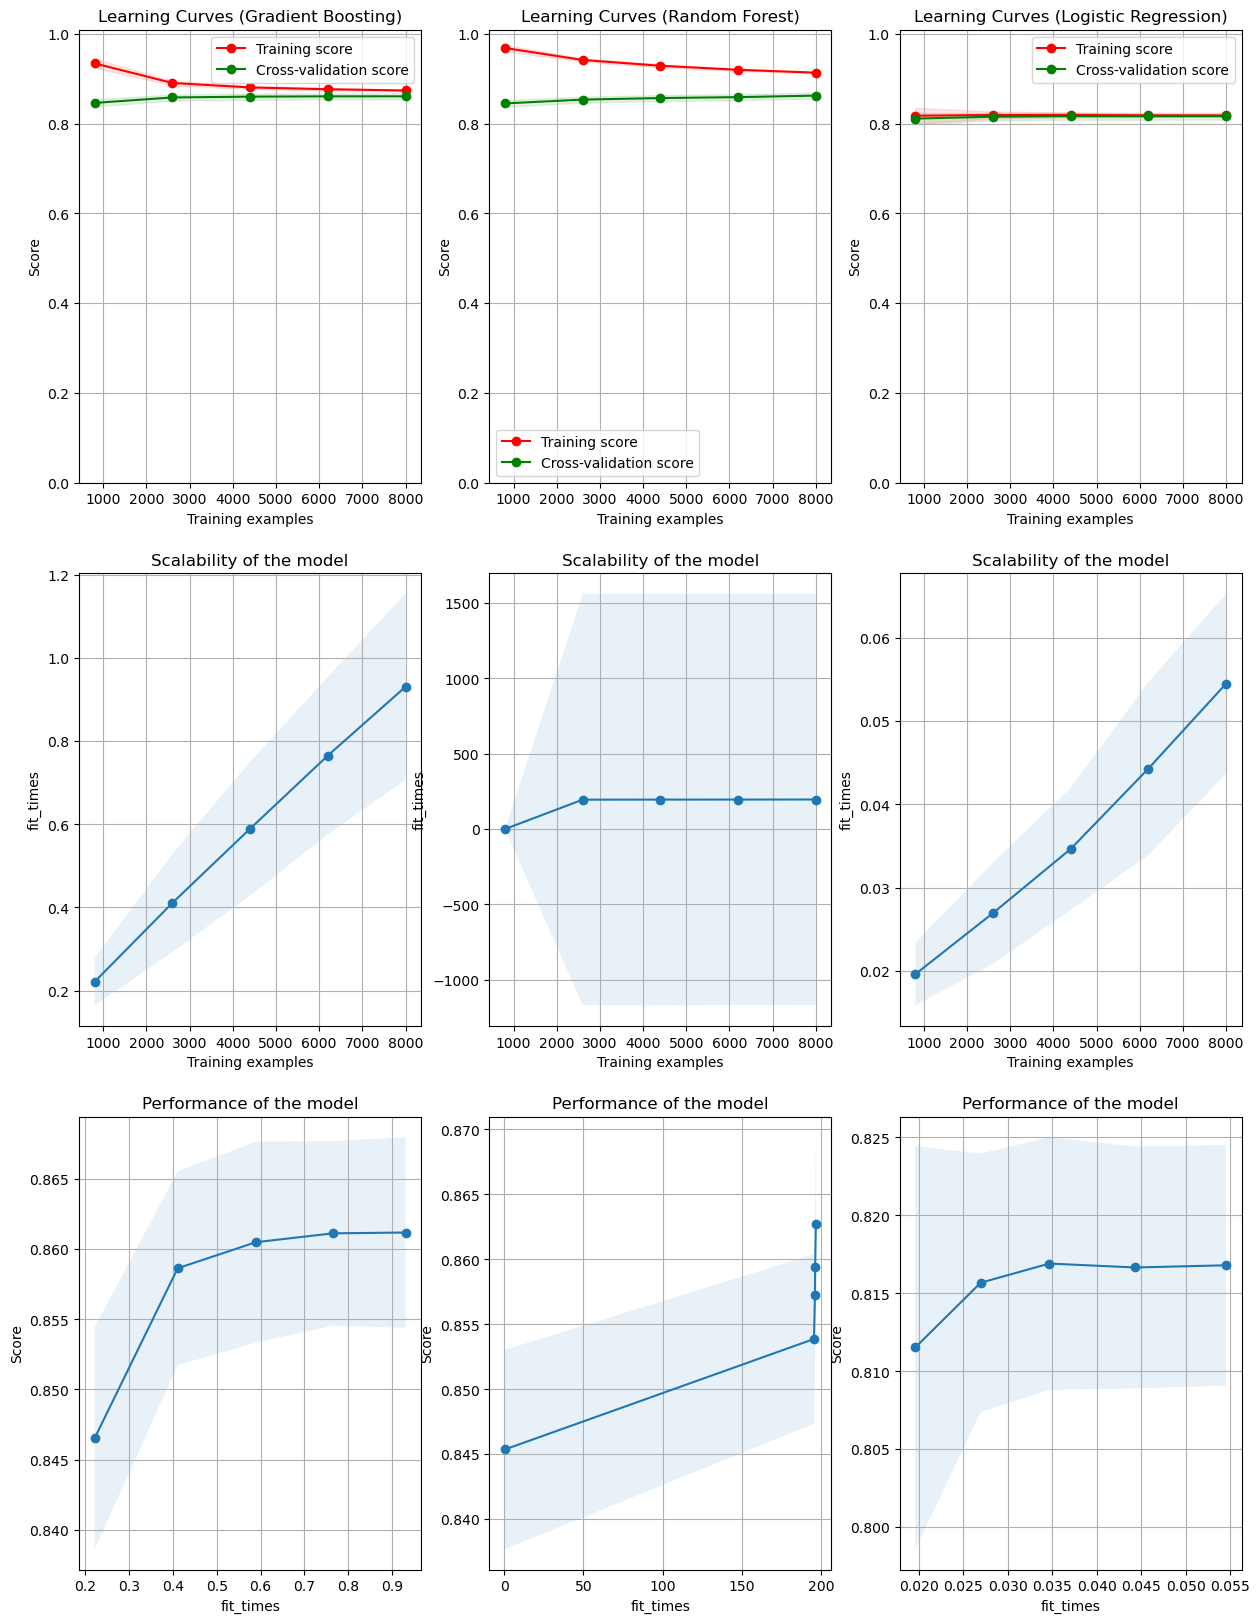

CPU times: total: 19.8 s
Wall time: 2h 44min 26s


In [104]:
%%time
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

title = "Learning Curves (Logistic Regression)"
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)

estimator = logRegHP
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 2], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)


title = "Learning Curves (Gradient Boosting)"
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)

estimator = grb
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 0], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)

# title 
title = r"Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)
# score curves, each time with 20% data randomly selected as a validation set.

estimator = ranForHP
plot_learning_curve(
    estimator, title, X, y, axes= axes[:, 1], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
)


savePlotFunction(44)